<a href="https://colab.research.google.com/github/j2cry/4fun/blob/main/coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Параметры

In [ ]:
days = 65               # рассматреваемый промежуток в днях (целое число)
cups = (4, 6)           # количество выпиваемых кружек кофе в сутки
cup_volume = 0.125      # объем одной кружки (л)
add_days = ()           # номера дней в неделе, когда дополнительно потребляется кофе [1; 7]
add_volume = 2 * 0.5    # количество дополнительно потребляемого кофе в один дополнительный день

water_price = 42.3 / 1000     # цена за литр холодной воды
electro_price = 0             # цена за электричество (в сутки), потраченное на приготовление кофе (пока пренебрегаем этим)
grain_price = 2500            # цена пакета зернового кофе
grain_period = 20             # кол-во дней, на которые хватает этого пакета при текущем потреблении

machine_price = 45000         # стоимость кофе-машины


shop_vol = 0.3            # стандартный объем кофе в магазине
shop_price = 140          # цена за стандартный объем кофе в магазине
promo_vol = 0.2           # объем промо-стакана в магазине
promo_count = 7           # частота получения бесплатного стакана кофе в магазине (1 на указанное кол-во)




# Расчеты

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
period = np.arange(0, days)

# объем потребления кофе по дням
daily_cofe = np.array([np.arange(cups[0], cups[1] + 1) * cup_volume] * period.size)
# + 2 чел по 0,5л 3 дня в неделю: 1, 2 и 4й день начиная с 1го
weekly = [day for day in range(period.size) if (day % 7 + 1) in add_days]
daily_cofe[weekly] = daily_cofe[weekly] + add_volume

# суммарный объем кофе на протяжении периода
cofe_volume = np.cumsum(daily_cofe, axis=0)

In [ ]:
# цена приготовленного кофе по дням (без учета стоимости кофе-машины)
cofe_price = daily_cofe * water_price + electro_price
gp = [p for p in range(period.size) if not (p % grain_period)]
cofe_price[gp] = cofe_price[gp] + grain_price
# поправка на цену кофемашины на рассматриваемый период
amend = np.array([[machine_price / (v+1) for v in range(days)]]*3).T

# суммарная стоимость кофе на протяжении периода с учетом стоимости кофе-машины
cofe_cost = np.cumsum(cofe_price, axis=0) + amend

In [ ]:
# Примерная цена за литр кофе в магазине с учетом акции Купи 6 стаканов получи 7ой бесплатно
shop_cofe_price = shop_price * (promo_count - 1) / (shop_vol * (promo_count - 1) + promo_vol)

# Результат<br>
Верхняя линия соответствует меньшему кол-ву чашек<br>
Красная горизонталь - примерная цена литра кофе в кафе

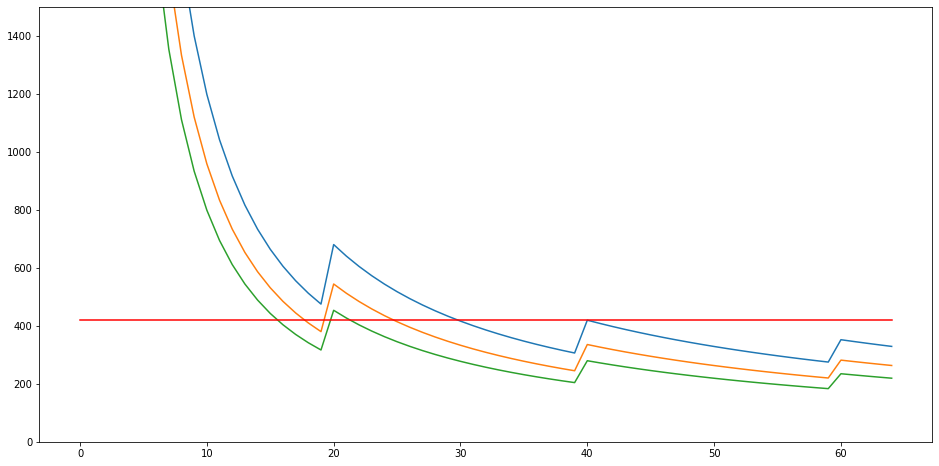

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(period, cofe_cost / cofe_volume)   # динамика средней цены литра домашнего кофе по дням в рассматриваемом периоде
plt.plot(period[[0, period.size - 1]], [shop_cofe_price] * 2, color='red')

plt.ylim(0, 1500)         # параметры для перемещения по графику по оси Oy
# plt.xlim(60, 100)         # параметры для перемещения по графику по оси Ox

plt.show()